<a href="https://colab.research.google.com/github/KittiphopSt/Project/blob/main/K_mean_Clustering_Project_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install gower

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import DistanceMetric
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy
import time
import gower
import math
import warnings
warnings.filterwarnings("ignore")
from scipy.spatial import ConvexHull
import matplotlib.colors
import colorsys

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Data_Project/Dataset already use/Iris/iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [ ]:
X = df.iloc[:,[0,1,2,3]].values

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
time_Kmean = []
X = pd.DataFrame(X)
for k in range(1,31):
  start_time = time.time()
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  end_time = time.time()
  time_Kmean.append(end_time-start_time)

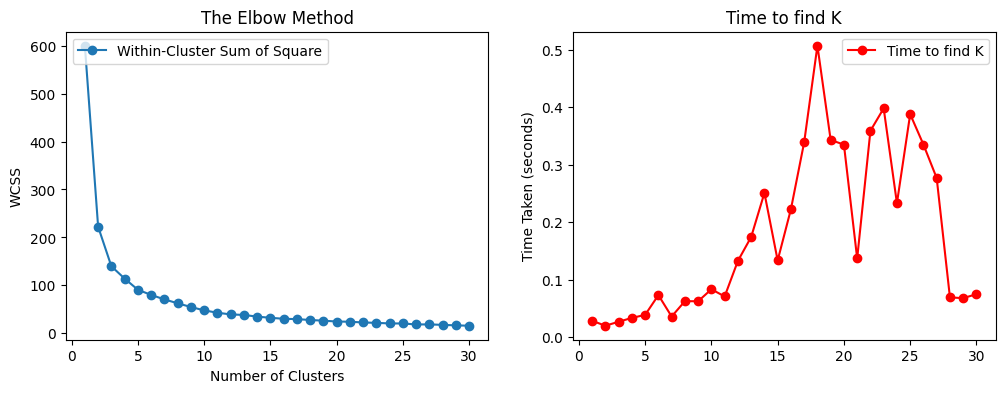

In [ ]:
KM = []
wcss = []
time_taken_Elbow = []
for i in range(1,31):
  start_time = time.time()
  kmeans = KMeans(n_clusters=i, init = 'k-means++',random_state=42)
  kmeans.fit(X)
  KM.append(kmeans)
  end_time = time.time()
  time_taken = end_time - start_time
  time_taken_Elbow.append(time_taken)
  wcss.append(kmeans.inertia_)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(range(1,31), wcss, label='Within-Cluster Sum of Square',marker='o')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('WCSS')
ax1.set_title('The Elbow Method')
ax1.legend(loc='upper left')
ax2.plot(range(1,31), time_taken_Elbow, marker='o', label='Time to find K',color='r')
ax2.set_ylabel('Time Taken (seconds)')
ax2.legend(loc='upper right')
ax2.set_title('Time to find K')
plt.show()

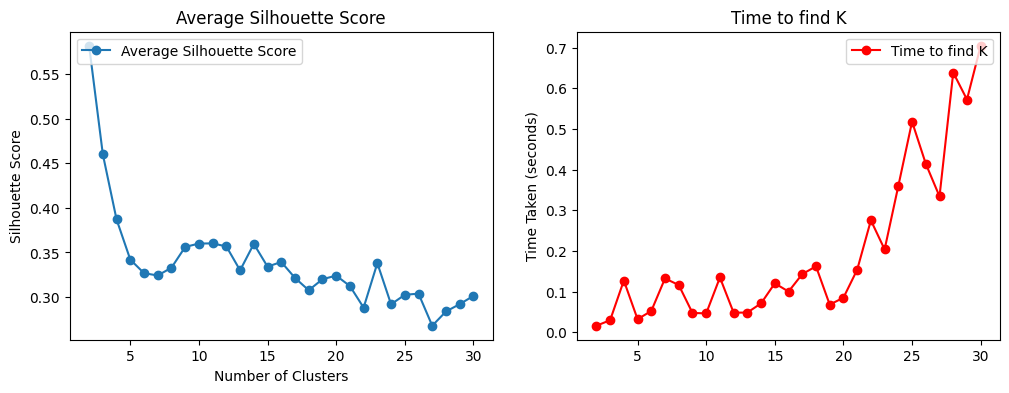

In [ ]:
s_score = []
time_taken_Silhouette = []
for i in range(2,31):
  start_time = time.time()
  Silhouette_K_means = KMeans(n_clusters= i , init = 'k-means++' , random_state=42)
  Silhouette_K_means.fit(X)
  end_time = time.time()
  time_taken = end_time - start_time
  time_taken_Silhouette.append(time_taken)
  s_score.append(silhouette_score(X, Silhouette_K_means.predict(X)))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(range(2,31), s_score, label='Average Silhouette Score',marker='o')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Silhouette Score')
ax1.legend(loc='upper left')
ax1.set_title('Average Silhouette Score')
ax2.plot(range(2,31), time_taken_Silhouette, label = 'Time to find K', marker='o',color='r')
ax2.set_ylabel('Time Taken (seconds)')
ax2.legend(loc='upper right')
ax2.set_title('Time to find K')
s_score.insert(0,0)
time_taken_Silhouette.insert(0,0)

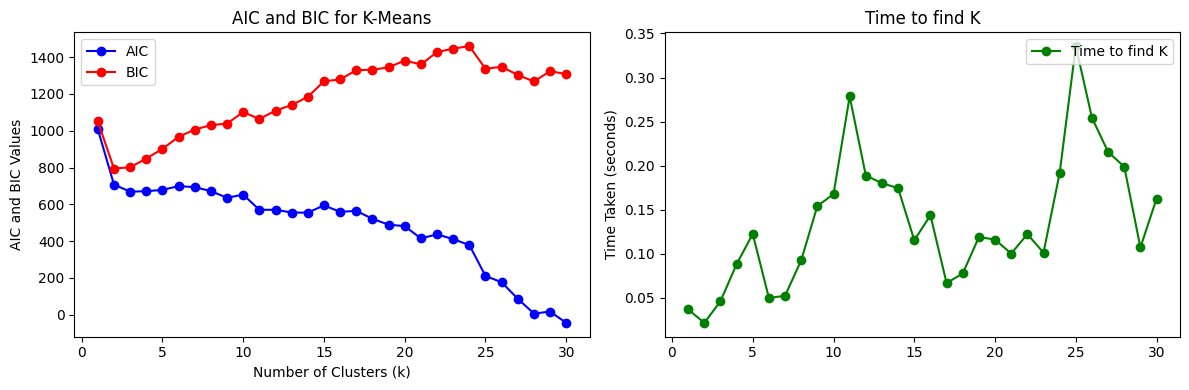

In [ ]:
AIC_score = []
BIC_score = []
time_taken_AIC_BIC = []
for i in range(1,31):
  start_time = time.time()
  gmm = GaussianMixture(n_components=i, random_state=42)
  gmm.fit(X)
  end_time = time.time()
  time_taken = end_time - start_time
  time_taken_AIC_BIC.append(time_taken)
  AIC_score.append(gmm.aic(X))
  BIC_score.append(gmm.bic(X))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(range(1, 31), AIC_score, marker='o', label='AIC', color='blue')
ax1.plot(range(1, 31), BIC_score, marker='o', label='BIC', color='red')
ax1.set_xlabel("Number of Clusters (k)")
ax1.set_ylabel("AIC and BIC Values")
ax1.set_title("AIC and BIC for K-Means")
ax1.legend(loc='upper left')
ax2.plot(range(1, 31), time_taken_AIC_BIC, label='Time to find K', marker='o', color='green')
ax2.set_ylabel('Time Taken (seconds)')
ax2.legend(loc='upper right')
ax2.set_title('Time to find K')

fig.tight_layout()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3,init = 'k-means++').fit(X)
y_kmeans = kmeans.fit_predict(X)

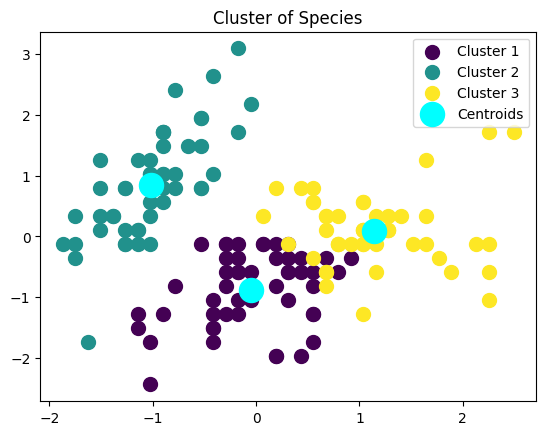

In [ ]:
for i in range(len(np.unique(y_kmeans))):
  plt.scatter(X.values[y_kmeans == i,0],X.values[y_kmeans == i,1], s = 100 ,color = plt.cm.viridis(np.linspace(0, 1, len(np.unique(y_kmeans))))[i],label=f'Cluster {i + 1}')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 300 ,color = 'cyan', label='Centroids')
plt.title('Cluster of Species')
plt.legend()
plt.show()

In [ ]:
result_df = pd.DataFrame(columns=df.columns.tolist() + ['Cluster Group'])
for cluster_id in range(len(kmeans.cluster_centers_)):
    cluster_data = df.iloc[kmeans.labels_ == cluster_id]
    cluster_data['Cluster Group'] = cluster_id
    result_df = result_df.append(cluster_data, ignore_index=True)
result_df['Cluster Group'] = pd.to_numeric(result_df['Cluster Group'])
result_df = result_df._get_numeric_data()
result_df

,sepal.length,sepal.width,petal.length,petal.width,Cluster Group
0,5.5,2.3,4.0,1.3,0
1,6.5,2.8,4.6,1.5,0
2,5.7,2.8,4.5,1.3,0
3,4.9,2.4,3.3,1.0,0
4,6.6,2.9,4.6,1.3,0
...,...,...,...,...,...
145,6.8,3.2,5.9,2.3,2
146,6.7,3.3,5.7,2.5,2
147,6.7,3.0,5.2,2.3,2
148,6.5,3.0,5.2,2.0,2


In [ ]:
cluster_centroids_dict = {label: centroid for label, centroid in enumerate(kmeans.cluster_centers_)}
cluster_centroids_dict

{0: array([-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]),
 1: array([-1.01457897,  0.85326268, -1.30498732, -1.25489349]),
 2: array([1.13597027, 0.08842168, 0.99615451, 1.01752612])}

In [ ]:
num_clusters = result_df['Cluster Group'].nunique()
cluster_group_data = {}
for cluster_id in range(num_clusters):
    cluster_group_data[cluster_id] = result_df[result_df['Cluster Group'] == cluster_id]
cluster_group_data

{0:     sepal.length  sepal.width  petal.length  petal.width  Cluster Group
 0            5.5          2.3           4.0          1.3              0
 1            6.5          2.8           4.6          1.5              0
 2            5.7          2.8           4.5          1.3              0
 3            4.9          2.4           3.3          1.0              0
 4            6.6          2.9           4.6          1.3              0
 5            5.2          2.7           3.9          1.4              0
 6            5.0          2.0           3.5          1.0              0
 7            5.9          3.0           4.2          1.5              0
 8            6.0          2.2           4.0          1.0              0
 9            6.1          2.9           4.7          1.4              0
 10           5.6          2.9           3.6          1.3              0
 11           5.6          3.0           4.5          1.5              0
 12           5.8          2.7           4.1    

In [ ]:
concatenated_df = pd.concat(cluster_group_data.values(), axis=0, ignore_index=True)
concatenated_df.to_csv(r'/content/drive/MyDrive/Project/Data ที่ใช้ได้/ผู้ถูกเลือก/Cluster/2-10/iris/cluster_k3_iris.csv',index=False)

In [ ]:
concatenated_df['Cluster Group'].value_counts()

0    53
1    50
2    47
Name: Cluster Group, dtype: int64

In [ ]:
gower_group_data = {}
cluster_add_centroids = {}
for cluster_id, cluster_df in cluster_group_data.items():
  cluster_group_data[cluster_id] = pd.DataFrame(scaler.fit_transform(cluster_df), columns=cluster_df.columns)
for i in range(num_clusters):
  cluster_add_centroids[i] = np.concatenate((cluster_group_data[i].drop(['Cluster Group'],axis=1).values,cluster_centroids_dict[i].reshape(1,-1)))
  gower_group_data[i] = gower.gower_matrix(cluster_add_centroids[i])[-1]
gower_group_data

{0: array([0.1690338 , 0.19644222, 0.14101355, 0.35314822, 0.2718624 ,
        0.22937813, 0.41921157, 0.18952297, 0.2382769 , 0.19009121,
        0.2672579 , 0.17000514, 0.19871819, 0.13032602, 0.17412603,
        0.2238798 , 0.1208766 , 0.2008055 , 0.26415128, 0.1503827 ,
        0.24073882, 0.19897886, 0.22645138, 0.18223467, 0.16383627,
        0.1994169 , 0.16536157, 0.24418098, 0.14350224, 0.14789784,
        0.20547582, 0.14761929, 0.36344233, 0.15956558, 0.23771684,
        0.1948597 , 0.23473951, 0.33419392, 0.17947508, 0.18799594,
        0.18365002, 0.15556602, 0.30228165, 0.1369059 , 0.23565651,
        0.22443743, 0.22511616, 0.21510737, 0.20162968, 0.2457044 ,
        0.18799594, 0.20190996, 0.2598447 , 0.        ], dtype=float32),
 1: array([0.19177581, 0.2179663 , 0.13304566, 0.20116122, 0.16320439,
        0.41363516, 0.18766916, 0.21479169, 0.2305263 , 0.19892077,
        0.24574406, 0.20923613, 0.16638109, 0.19350769, 0.2742335 ,
        0.46760342, 0.30252406, 0.241

In [ ]:
combined_data = []
for key in sorted(gower_group_data.keys()):
    combined_data.extend(gower_group_data[key])
df1 = pd.DataFrame({'gower all': combined_data})
print(np.median(df1))
df1.to_csv('/content/drive/MyDrive/Data_Project/Dataset already use/Breast cancer/Gower_all_iris.csv')

0.22299169


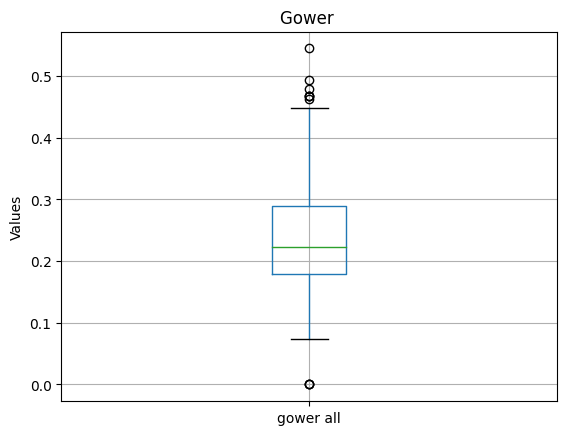

In [ ]:
df1.boxplot(column='gower all')
plt.title('Gower ')
plt.ylabel('Values')
plt.show()

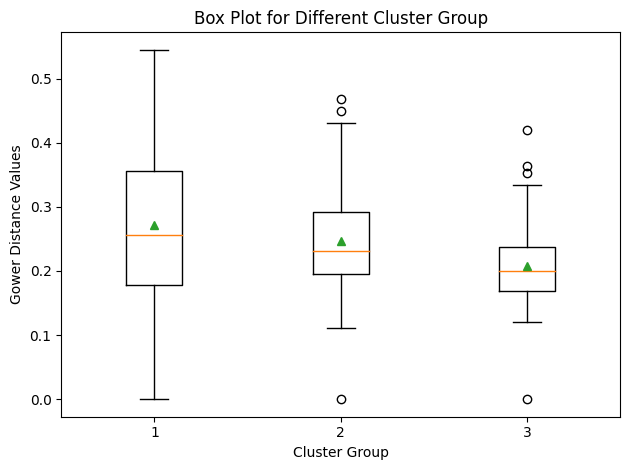

Median Group 1: 0.26
Median Group 2: 0.23
Median Group 3: 0.20


In [ ]:
fig, ax = plt.subplots()
ax.boxplot(list(gower_group_data.values()),labels = [f'{i}' for i in range(1, len(gower_group_data) + 1)],showmeans=True)
ax.set_title('Box Plot for Different Cluster Group')
ax.set_xlabel('Cluster Group')
ax.set_ylabel('Gower Distance Values')
plt.tight_layout()
plt.show()
medians = [np.median(data) for data in gower_group_data.values()]
for i in range(len(medians)):
    print(f'Median Group {i+1}: {medians[i]:.2f}')

In [ ]:
a = pd.DataFrame({'k':range(1,31),
                  'Within Cluster Sum of Squares':wcss,
                  'Silhouette Score':s_score,
                  'Akaike Information Criterion (AIC)':AIC_score,
                  'Bayesian Information Criterion (BIC)':BIC_score,
                  'K':range(1,31),
                  'Time Kmean':time_Kmean,
                  'Time Taken Elbow':time_taken_Elbow,
                  'Time Taken Silhouette':time_taken_Silhouette,
                  'Time Taken AIC & BIC':time_taken_AIC_BIC,
                  })
a

,k,Within Cluster Sum of Squares,Silhouette Score,Akaike Information Criterion (AIC),Bayesian Information Criterion (BIC),K,Time Kmean,Time Taken Elbow,Time Taken Silhouette,Time Taken AIC & BIC
0,1,600.000000,0.000000,1008.520430,1050.669324,1,0.014215,0.008131,0.000000,0.036989
1,2,222.361705,0.581750,707.400579,794.709002,2,0.018279,0.009879,0.015918,0.021615
2,3,139.820496,0.459948,669.077919,801.545872,3,0.022673,0.013556,0.029415,0.046098
3,4,114.092547,0.386941,671.621665,849.249147,4,0.034697,0.017270,0.127050,0.088218
4,5,90.807283,0.341947,678.598788,901.385800,5,0.035626,0.019284,0.032005,0.122520
5,6,80.036875,0.326745,699.284389,967.230930,6,0.040879,0.022413,0.052136,0.049881
6,7,70.719643,0.324136,693.555479,1006.661549,7,0.072444,0.042951,0.132263,0.052383
7,8,62.564909,0.332874,672.208004,1030.473604,8,0.025219,0.029491,0.116024,0.092608
8,9,54.827721,0.356163,635.678549,1039.103679,9,0.026371,0.026839,0.047460,0.154219
9,10,47.801105,0.359956,653.058109,1101.642767,10,0.032619,0.029064,0.046184,0.167645


In [ ]:
#a.to_csv(r'/content/drive/MyDrive/Project/Data_Already_Group/k5.csv',index=False)